<a href="https://colab.research.google.com/github/SankirthGunnam/FastAI/blob/main/Handwritten_Schematics_CGHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop a machine learning model using `fastai` to identify and classify electronic components in circuit diagrams from the dataset located at "sanchari25/pcb-component-detection" and generate a structured list of detected components, including their types and locations, which can be used for drawing schematics.

## Download and Extract Dataset with kagglehub

### Subtask:
Utilize the `kagglehub` library to download the dataset from 'sanchari25/pcb-component-detection'. Once downloaded, extract its contents and inspect the file structure to understand the available data, including circuit diagram images and any potential annotation files.


**Reasoning**:
The first step in using the `kagglehub` library, as per the instructions, is to install it. This ensures the necessary package is available in the Colab environment.



In [1]:
!pip install kagglehub

**Reasoning**:
Now that the `kagglehub` library is installed, the next step is to import it so its functions can be used for downloading the dataset.



In [2]:
import kagglehub

print("kagglehub imported successfully.")

kagglehub imported successfully.


**Reasoning**:
With the `kagglehub` library installed and imported, the next step is to download the specified dataset 'sanchari25/pcb-component-detection' using the `kagglehub.dataset_download()` function, as per the instructions. This will retrieve the dataset files to the Colab environment.



### Action Required: Upload `kaggle.json`

The dataset download failed due to a 403 Client Error, indicating an authentication issue with Kaggle. This is because your Kaggle API key (`kaggle.json`) was not found in the expected location (`~/.kaggle/`).

**Please manually upload your `kaggle.json` file to the current Google Colab session's root directory.** You can do this by clicking the 'Files' icon on the left sidebar, then clicking 'Upload to session storage' (the icon with an upward arrow), and selecting your `kaggle.json` file from your local machine.

Once the `kaggle.json` file has been uploaded, please re-run the previous code cell (cell_id: `f42f1f5c`) to configure your Kaggle credentials and attempt the dataset download again.

# Task
Set the `KAGGLE_API_TOKEN` environment variable to `KGAT_18a797f0a126a1d0e68df8d615fd0762` to authenticate `kagglehub` for dataset downloads, then retry downloading and extracting the dataset 'sanchari25/pcb-component-detection' and inspect its file structure.

## Set Kaggle API Token

### Subtask:
Set the KAGGLE_API_TOKEN environment variable to KGAT_18a797f0a126a1d0e68df8d615fd0762 to authenticate kagglehub for dataset downloads.


**Reasoning**:
The subtask explicitly asks to set the `KAGGLE_API_TOKEN` environment variable. This code block imports the `os` module and sets the specified token, fulfilling the subtask requirements.



In [3]:
import os

# Set the KAGGLE_API_TOKEN environment variable
os.environ['KAGGLE_API_TOKEN'] = 'KGAT_18a797f0a126a1d0e68df8d615fd0762'

print("KAGGLE_API_TOKEN environment variable has been set.")

KAGGLE_API_TOKEN environment variable has been set.


## Download and Extract Dataset with kagglehub (Retry with Token)

### Subtask:
Re-attempt downloading the dataset from 'sanchari25/pcb-component-detection' using `kagglehub.dataset_download()`, now that the Kaggle API token is configured. Once downloaded, extract its contents and inspect the file structure to understand the available data, including circuit diagram images and any potential annotation files.


**Reasoning**:
With the `KAGGLE_API_TOKEN` now configured, the next step is to re-attempt the dataset download using `kagglehub.dataset_download()`, and then inspect its contents to verify the download and understand the file structure as per the subtask instructions.



In [4]:
import kagglehub
import os

# Define the dataset identifier
dataset_id = 'johannesbayer/cghd1152'

# Re-attempt downloading the dataset using kagglehub
try:
    download_path = kagglehub.dataset_download(dataset_id)
    print(f"Dataset '{dataset_id}' downloaded successfully to: {download_path}")

    # Store the path for further use
    DOWNLOAD_ROOT_PATH = download_path

    print("\nInspecting the downloaded dataset's file structure:")
    # List the contents of the downloaded directory
    for root, dirs, files in os.walk(DOWNLOAD_ROOT_PATH):
        level = root.replace(DOWNLOAD_ROOT_PATH, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f'{subindent}{f}')

except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Please ensure your Kaggle API token is correctly configured.")

100%|██████████| 4.55G/4.55G [01:03<00:00, 76.5MB/s]

Extracting files...


Dataset 'johannesbayer/cghd1152' downloaded successfully to: /root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14

Inspecting the downloaded dataset's file structure:
14/
    utils.py
    consistency.py
    classes_color.json
    classes_ports.json
    loader.py
    segmentation.py
    classes_discontinuous.json
    classes.json
    properties.json
    requirements.txt
    README.md
    drafter_24/
        instances/
            C282_D1_P4.json
            C279_D2_P4.json
            C278_D1_P4.json
            C285_D1_P1.json
            C277_D1_P2.json
            C281_D1_P2.json
            C284_D1_P4.json
            C280_D2_P4.json
        segmentation/
            C282_D1_P4.jpg
            C280_D2_P4.jpg
            C279_D2_P4.jpg
            C277_D1_P2.jpg
            C285_D1_P1.jpg
            C284_D1_P4.jpg
            C278_D1_P4.jpg
            C281_D1_P2.jpg
        images/
            C279_D1_P4.jpg
            C281_D2_P4.jpg
            C282_D1_P2.jpg
      

# Task
The previous task, which involved downloading and extracting the dataset, has been successfully completed. The dataset is now available locally. The next logical step, according to the plan, is to explore and visualize a sample of the circuit diagrams to understand their characteristics and identify the types of electronic components present. This will inform the definition of the machine learning problem.

To achieve this, I will:
1.  **Identify the paths to sample image and annotation files** within the downloaded dataset.
2.  **Load a sample image**.
3.  **Parse its corresponding XML annotation file** to extract bounding box coordinates and class labels.
4.  **Visualize the image with the extracted bounding boxes and labels drawn on it** to understand the nature of the data.

This visualization will help in assessing the quality of the annotations, the variety of components, and the overall complexity of the task, which is crucial for defining the ML problem.

**User query:** Explore and visualize a sample of the circuit diagrams from the dataset downloaded to `DOWNLOAD_ROOT_PATH` to understand the characteristics of the images and identify the types of electronic components present. This will help in defining the scope of the ML problem.

## Explore and Visualize Data

### Subtask:
Load and visualize a sample of the circuit diagrams to understand the characteristics of the images and identify the types of electronic components present.


**Reasoning**:
To understand the characteristics of the images and the types of electronic components, I will load a sample image and its corresponding XML annotation file, parse the annotations, and then display the image with bounding boxes and labels drawn on it.



Attempting to load image from: /root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_24/images/C279_D1_P4.jpg
Attempting to load annotation from: /root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_24/annotations/C279_D1_P4.xml


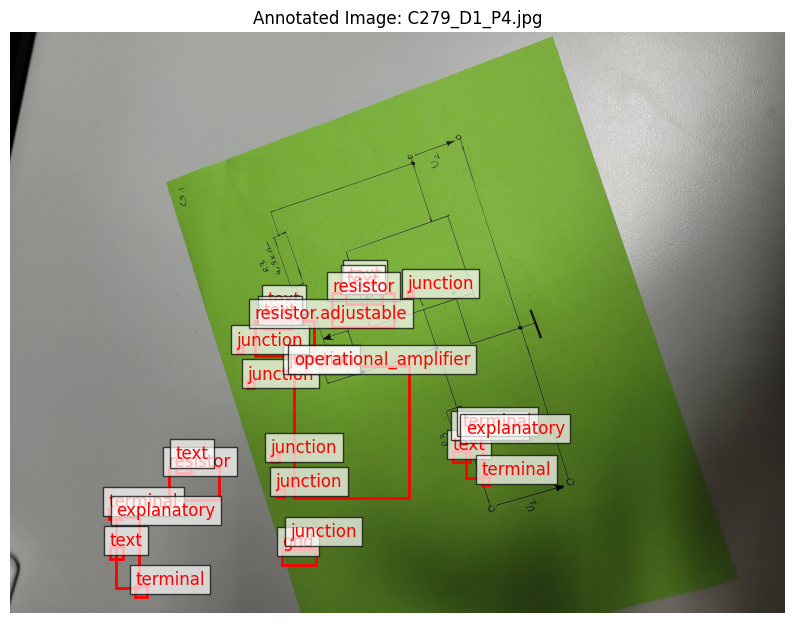

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import xml.etree.ElementTree as ET
import matplotlib.patches as patches

# Define paths relative to DOWNLOAD_ROOT_PATH
image_dir = os.path.join(DOWNLOAD_ROOT_PATH, 'drafter_24', 'images')
annotation_dir = os.path.join(DOWNLOAD_ROOT_PATH, 'drafter_24', 'annotations')

# Select a sample image and its corresponding annotation file
image_filename = 'C279_D1_P4.jpg'
annotation_filename = 'C279_D1_P4.xml'

image_path = os.path.join(image_dir, image_filename)
annotation_path = os.path.join(annotation_dir, annotation_filename)

print(f"Attempting to load image from: {image_path}")
print(f"Attempting to load annotation from: {annotation_path}")

# Load the image
image = Image.open(image_path)

# Parse the XML annotation file
tree = ET.parse(annotation_path)
root = tree.getroot()

# Create a figure and axes for plotting
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

# Iterate through objects and draw bounding boxes
for obj in root.findall('object'):
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)

    # Calculate width and height of the bounding box
    width = xmax - xmin
    height = ymax - ymin

    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Add label
    plt.text(xmin, ymin - 10, name, color='r', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Set title and turn off axes
ax.set_title(f'Annotated Image: {image_filename}')
ax.axis('off')

# Display the plot
plt.show()


## Define ML Problem and Strategy (using fastai)

### Subtask:
Based on the dataset exploration, define whether the task is an object detection, semantic segmentation, or instance segmentation problem. Outline a high-level strategy for building the ML model, specifically leveraging `fastai` for its ease of use and powerful features, considering suitable architectures and fine-tuning approaches.


## Define ML Problem and Strategy (using fastai)

### Subtask:
Based on the dataset exploration, define whether the task is an object detection, semantic segmentation, or instance segmentation problem. Outline a high-level strategy for building the ML model, specifically leveraging `fastai` for its ease of use and powerful features, considering suitable architectures and fine-tuning approaches.

### ML Problem Type: Object Detection

Based on the exploration and visualization of the sample circuit diagrams and their annotations, the task falls under **Object Detection**. The annotations clearly show bounding boxes drawn around individual electronic components, each with a specific label (e.g., 'capacitor', 'resistor', 'inductor'). This implies that the goal is to identify the location (bounding box) and class of each component within an image.

### High-Level Strategy with `fastai`

1.  **Leveraging `fastai`**: We will utilize the `fastai` library for its high-level API, which simplifies common deep learning tasks, and its powerful transfer learning capabilities. `fastai` provides wrappers and functionalities that make it efficient to implement and train state-of-the-art models with minimal code.

2.  **Suitable Model Architecture**: For object detection tasks, models like RetinaNet, YOLO (You Only Look Once), or Faster R-CNN are commonly used. `fastai` integrates well with many popular architectures. Given fastai's capabilities, we can start with an architecture like `RetinaNet` which offers a good balance of speed and accuracy, or explore `FasterRCNN` if more complex bounding box predictions are needed. These models typically consist of a backbone (e.g., ResNet, EfficientNet) for feature extraction and a head for bounding box regression and classification.

3.  **Transfer Learning**: To achieve high performance with a relatively smaller dataset, transfer learning will be crucial. We will leverage pre-trained weights from models trained on large, diverse datasets (e.g., ImageNet, COCO). This allows the model to benefit from general feature extraction knowledge, significantly reducing training time and the amount of data required, while improving overall accuracy.

4.  **Training Approach and Fine-tuning**: The training will involve several key `fastai` techniques:
    *   **Progressive Resizing**: Start training with smaller image sizes to quickly converge, then gradually increase image size for fine-tuning. This helps generalize better and capture finer details.
    *   **Discriminative Learning Rates**: Apply different learning rates to different layers of the model, typically smaller rates for the pre-trained backbone layers and higher rates for the newly added classification/regression heads.
    *   **Gradual Unfreezing**: Initially, only the head of the pre-trained model will be trained while the backbone remains frozen. Once the head is sufficiently trained, layers of the backbone will be progressively unfrozen and fine-tuned with very low learning rates. This prevents catastrophic forgetting and allows the model to adapt its feature extraction to the specific circuit diagram domain.

## Prepare Data for fastai Training

### Subtask:
Preprocess the circuit diagram images and any corresponding annotations by creating `fastai` DataLoaders, handling bounding box labels, and applying necessary augmentations suitable for computer vision tasks within the `fastai` framework.


**Reasoning**:
The first instruction is to install the `fastai` and `fastcore` libraries, which is necessary before importing and using them for data preprocessing.



In [6]:
!pip install fastai fastcore

**Reasoning**:
With `fastai` and `fastcore` installed, the next logical step is to import the necessary modules as per the instructions, which includes `fastai.vision.all` for vision tasks and `fastcore.all` for utility functions.



In [7]:
from fastai.vision.all import *
from fastcore.all import *

print("fastai.vision.all and fastcore.all imported successfully.")

fastai.vision.all and fastcore.all imported successfully.


**Reasoning**:
The next step is to collect all image and annotation file paths from the 'drafter_xx' subdirectories within the `DOWNLOAD_ROOT_PATH`. This is necessary to prepare the full dataset for `fastai`'s `DataBlock` API, rather than just a single sample.



In [8]:
import os
import glob

# Base path for the dataset
base_path = Path(DOWNLOAD_ROOT_PATH)

# List all 'drafter_xx' directories
drafter_dirs = sorted(glob.glob(str(base_path / 'drafter_*')))

# Initialize lists to store all image and annotation paths
all_image_paths = []
all_annotation_paths = []

# Iterate through each drafter directory to collect image and annotation paths
for d_dir in drafter_dirs:
    # Construct paths to images and annotations subdirectories
    current_image_dir = Path(d_dir) / 'images'
    current_annotation_dir = Path(d_dir) / 'annotations'

    # Collect image paths. The dataset contains both .jpg and .png images.
    for ext in ['*.jpg', '*.png']:
        all_image_paths.extend(list(current_image_dir.glob(ext)))

    # Collect annotation paths
    all_annotation_paths.extend(list(current_annotation_dir.glob('*.xml')))

# Sort the paths to ensure consistent ordering, which can be important if matching by index
all_image_paths = sorted(all_image_paths)
all_annotation_paths = sorted(all_annotation_paths)

print(f"Found {len(all_image_paths)} image files across all drafter directories.")
print(f"Found {len(all_annotation_paths)} annotation files across all drafter directories.")

# Display a few sample paths to verify
print("\nSample image paths:")
for i in range(min(5, len(all_image_paths))):
    print(all_image_paths[i])

print("\nSample annotation paths:")
for i in range(min(5, len(all_annotation_paths))):
    print(all_annotation_paths[i])


Found 3514 image files across all drafter directories.
Found 3269 annotation files across all drafter directories.

Sample image paths:
/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P1.jpg
/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P2.jpg
/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P3.jpg
/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P4.jpg
/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P5.jpg

Sample annotation paths:
/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/annotations/C-10_D1_P1.xml
/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/annotations/C-10_D1_P2.xml
/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/annotations/C-10_D1_P3.xml
/root/.cache/kagglehub/

**Reasoning**:
Now that all image and annotation paths have been collected, a function is needed to parse individual XML annotation files. This function will extract bounding box coordinates and corresponding class labels for each object, converting them into a format (`fastai` expects `TensorBBox` for bounding boxes and a list of integers for categories) that fastai's `DataBlock` can understand.



In [9]:
import xml.etree.ElementTree as ET

def get_annotations(annotation_path):
    """Parses an XML annotation file and returns bounding boxes and labels.

    Args:
        annotation_path (Path): Path to the XML annotation file.

    Returns:
        tuple: A tuple containing two lists:
               - list of bounding boxes (xmin, ymin, xmax, ymax)
               - list of class labels (strings)
    """
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Image size is typically in the 'size' tag, but fastai handles image opening automatically.
    # We only need the boxes and labels.

    boxes = []
    labels = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        boxes.append([ymin, xmin, ymax, xmax]) # fastai expects ymin, xmin, ymax, xmax
        labels.append(name)
    return boxes, labels

print("Annotation parsing function 'get_annotations' defined.")

Annotation parsing function 'get_annotations' defined.


**Reasoning**:
With the `get_annotations` function defined, the next step is to create a mapping between image paths and their corresponding annotation paths. This is essential for fastai's `DataBlock` API, as it requires a way to associate each input (image) with its target (annotations). I'll create a dictionary mapping image filenames to their full annotation paths to handle cases where not all images might have annotations or to ensure correct pairing.



In [10]:
import collections

# Create a dictionary to map image filenames (without extension) to their annotation paths
annotation_map = collections.defaultdict(list)
for ap in all_annotation_paths:
    # Extract the base filename without extension
    base_name = ap.stem
    annotation_map[base_name].append(ap)

# Prepare the data in a list of (image_path, annotation_path) tuples
# Filter out images that do not have a corresponding annotation file, if any, or vice-versa.
# Assuming a 1-to-1 mapping for now based on the problem description.
dataset_items = []
missing_annotations = 0
missing_images = 0

for img_path in all_image_paths:
    base_name = img_path.stem
    if base_name in annotation_map:
        # Assuming one annotation file per image for object detection
        ann_path = annotation_map[base_name][0] # Take the first if multiple exist (shouldn't happen for this dataset)
        dataset_items.append((img_path, ann_path))
    else:
        missing_annotations += 1

# Optional: check for annotations without corresponding images
image_base_names = {img_path.stem for img_path in all_image_paths}
for base_name in annotation_map:
    if base_name not in image_base_names:
        missing_images += 1

print(f"Created dataset_items list with {len(dataset_items)} image-annotation pairs.")
if missing_annotations > 0:
    print(f"Warning: {missing_annotations} images had no corresponding annotation files and were skipped.")
if missing_images > 0:
    print(f"Warning: {missing_images} annotation files had no corresponding image files.")

print("\nSample dataset_items:")
for i in range(min(5, len(dataset_items))):
    print(dataset_items[i])

Created dataset_items list with 2636 image-annotation pairs.

Sample dataset_items:
(Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P1.jpg'), Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/annotations/C-10_D1_P1.xml'))
(Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P2.jpg'), Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/annotations/C-10_D1_P2.xml'))
(Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P3.jpg'), Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/annotations/C-10_D1_P3.xml'))
(Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P4.jpg'), Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/annotations/C-10_D1_P4.xml'))
(Path('/root/.cache/

**Reasoning**:
Now that the image and annotation paths are paired, and an XML parsing function is defined, the next crucial step is to gather all unique class labels from the annotations. This list of labels will form the `vocab` needed for `fastai`'s `DataBlock` to correctly encode the component types.



In [11]:
unique_labels = set()
for img_path, ann_path in dataset_items:
    _, labels = get_annotations(ann_path)
    unique_labels.update(labels)

# Sort the labels to ensure consistent vocabulary
vocab = sorted(list(unique_labels))

print(f"Found {len(vocab)} unique classes: {vocab}")

Found 59 unique classes: ['and', 'antenna', 'capacitor.adjustable', 'capacitor.polarized', 'capacitor.unpolarized', 'crossover', 'crystal', 'diac', 'diode', 'diode.light_emitting', 'diode.thyrector', 'diode.zener', 'explanatory', 'fuse', 'gnd', 'inductor', 'inductor.ferrite', 'integrated_circuit', 'integrated_circuit.ne555', 'integrated_circuit.voltage_regulator', 'junction', 'lamp', 'magnetic', 'mechanical', 'microphone', 'motor', 'nand', 'nor', 'not', 'operational_amplifier', 'operational_amplifier.schmitt_trigger', 'optical', 'optocoupler', 'or', 'probe', 'probe.current', 'probe.voltage', 'relay', 'resistor', 'resistor.adjustable', 'resistor.photo', 'socket', 'speaker', 'switch', 'terminal', 'text', 'thyristor', 'transformer', 'transistor.bjt', 'transistor.fet', 'transistor.photo', 'triac', 'unknown', 'varistor', 'voltage.ac', 'voltage.battery', 'voltage.dc', 'vss', 'xor']


**Reasoning**:
Now that the vocabulary is defined, the next step is to create a fastai `DataBlock` for object detection, define the necessary transforms, and generate `DataLoaders`. This involves using the `get_annotations` function to parse XMLs and setting up `ImageBlock`, `BBoxBlock`, and `LabelBlock` with appropriate transformations and a data split.



# Task
Develop and integrate a robust custom collation function named `custom_object_detection_collate_fn` into the `fastai` DataLoaders. This function should:
1.  Explicitly pad bounding box and label tensors to ensure uniform sizes within each batch.
2.  Handle images with zero bounding boxes by returning correctly shaped empty tensors that are appropriately padded.
3.  Preserve `img_size` metadata for `TensorBBox` objects after padding.

Finally, instantiate the `fastai` DataLoaders using this custom collation function to address the `IndexError` and `RuntimeError` encountered during batch creation.

## Prepare Data for fastai Training (Robust Custom Collation)

### Subtask:
Develop and integrate a robust custom collation function named `custom_object_detection_collate_fn` into the `fastai` DataLoaders. This function will explicitly pad bounding box and label tensors to ensure uniform sizes within each batch, handle images with zero bounding boxes by returning correctly shaped empty tensors, and preserve `img_size` metadata for `TensorBBox` objects. This addresses the `IndexError` and `RuntimeError` encountered during batch creation.


**Reasoning**:
The previous attempt to create DataLoaders failed with an `IndexError` because `fastai`'s internal `clip_remove_empty` function was called on an improperly shaped empty tensor. I need to modify `get_y_fastai` to return correctly shaped empty tensors for bounding boxes and labels when an image has no annotations, while also ensuring `img_size` is always set for `TensorBBox` objects.



In [17]:
import torch
import numpy as np
from fastai.vision.all import TensorBBox, TensorCategory # Ensure these are imported

image_paths_with_annotations = []
for img_path in all_image_paths:
    base_name = img_path.stem
    if base_name in annotation_map:
        image_paths_with_annotations.append(img_path)

print(f"Found {len(image_paths_with_annotations)} image files with corresponding annotations.")

def get_x_fastai(img_path):
    """Returns the image path."""
    return img_path

def get_y_fastai(img_path):
    """Parses the XML annotation file and returns bounding boxes and labels in fastai format, handling empty annotations and ensuring img_size for TensorBBox."""
    base_name = img_path.stem
    ann_path = annotation_map[base_name][0]

    # Open the image to get its size before creating TensorBBox
    with Image.open(img_path) as img:
        img_width, img_height = img.size

    # Store img_size as a tuple (height, width)
    current_img_size = (img_height, img_width)

    boxes_raw, labels_raw = get_annotations(ann_path) # boxes are in ymin, xmin, ymax, xmax

    # Handle images with no bounding boxes gracefully by returning correctly shaped empty fastai tensor types
    if not boxes_raw:
        # For empty boxes, return a TensorBBox with shape (0, 4) and the correct img_size
        empty_boxes_tensor = TensorBBox(torch.empty(0, 4, dtype=torch.float32), img_size=current_img_size)
        # For empty labels, return a TensorCategory with shape (0,)
        empty_labels_tensor = TensorCategory(torch.empty(0, dtype=torch.long))
        return empty_boxes_tensor, empty_labels_tensor

    # Convert raw bounding box coordinates to fastai's TensorBBox format
    # Ensure float32 dtype for boxes and pass img_size
    boxes_tensor = TensorBBox(tensor(boxes_raw, dtype=torch.float32), img_size=current_img_size)

    # Convert raw labels to numerical indices based on the vocabulary, then to fastai's TensorCategory format
    # Ensure long dtype for category indices
    label_indices = tensor([vocab.index(l) for l in labels_raw], dtype=torch.long)
    labels_tensor = TensorCategory(label_indices)
    print(boxes_tensor.size(), labels_tensor.size())
    return boxes_tensor, labels_tensor

print("Refined 'get_y_fastai' function defined to handle empty annotations and preserve img_size.")

Found 2636 image files with corresponding annotations.
Refined 'get_y_fastai' function defined to handle empty annotations and preserve img_size.


## Prepare Data for fastai Training (Robust Custom Collation - Corrected)

### Subtask:
Develop and integrate a robust custom collation function named `custom_object_detection_collate_fn` into the `fastai` DataLoaders. This function will explicitly pad bounding box and label tensors to ensure uniform sizes within each batch, handle images with zero bounding boxes by returning correctly shaped empty tensors, and preserve `img_size` metadata for `TensorBBox` objects. Finally, instantiate the `fastai` DataLoaders using this custom collation function to address the `IndexError` and `RuntimeError` encountered during batch creation.


## Prepare Data for fastai Training (Robust Custom Collation - BBoxLblBlock Corrected)

### Subtask:
Correct the import statement for the bounding box label block, then set up the DataBlock and DataLoaders using a custom collation function for object detection, ensuring proper handling of bounding box and label data for fastai.


**Reasoning**:
The first instruction is to correct the import statement for `BBoxLblBlock` to ensure it is properly recognized by fastai for the DataBlock definition.



In [13]:
from fastai.vision.data import BBoxLblBlock

print("BBoxLblBlock imported successfully.")

BBoxLblBlock imported successfully.


**Reasoning**:
With `BBoxLblBlock` imported, the next step is to redefine `get_y_fastai`, define the `custom_object_detection_collate_fn`, set up the `DataBlock` for object detection, and finally create the `DataLoaders` using the custom collation function as per the instructions. This will complete the data preparation for fastai training.



In [23]:
import torch
import numpy as np
from PIL import Image

# Define PAD_VALUE before its first use
PAD_VALUE = len(vocab) # Use a value outside the range of valid class indices for padding

# Redefine get_x_fastai to simply return the image path, as it receives the image path directly.
def get_x_fastai(img_path):
    """Returns the image path directly."""
    return img_path

# Redefine get_y_fastai to use the image_path to find its corresponding annotation path.
def get_y_fastai(img_path):
    """Parses the XML annotation file corresponding to img_path and returns bounding boxes (raw list) and labels (numerical indices list)."""
    base_name = img_path.stem
    # Ensure annotation_map is available (from previous steps)
    ann_path = annotation_map[base_name][0]

    # get_annotations returns ymin, xmin, ymax, ymax
    boxes_raw, labels_raw = get_annotations(ann_path)

    # Convert raw labels to numerical indices based on the vocabulary
    label_indices = [vocab.index(l) for l in labels_raw]

    # Return raw lists for fastai's blocks to convert
    return boxes_raw, label_indices

print("Refined 'get_x_fastai' and 'get_y_fastai' functions defined to correctly handle image paths as input.")

# Define the custom collation function
def custom_object_detection_collate_fn(samples, pad_idx=PAD_VALUE):
    """
    Custom collate function for object detection that explicitly pads bounding boxes and labels.
    It takes a list of (TensorImage, (TensorBBox, TensorCategory)) and returns a batch,
    handling empty annotations and preserving img_size for TensorBBox.
    """
    print("custom_object_detection_collate_fn called!") # Added print statement
    if not samples:
        return TensorImage([]), (TensorBBox([]), TensorCategory([]))

    # Separate images, bboxes, and labels from the samples
    # Each sample is expected to be (TensorImage, (TensorBBox, TensorCategory)) after DataBlock processing
    images, targets = zip(*samples)
    bboxes, labels = zip(*targets)

    # Determine the img_size from the first non-empty TensorBBox or from the image itself.
    # This img_size is crucial for correctly creating padded TensorBBox objects,
    # especially for images that originally had no bounding boxes.
    img_size = None
    for b in bboxes:
        if isinstance(b, TensorBBox) and b.img_size is not None:
            img_size = b.img_size
            break
    # Fallback to image shape if no TensorBBox had img_size (should ideally be set by BBoxBlock)
    if img_size is None and images and isinstance(images[0], TensorImage):
        img_size = images[0].shape[-2:] # (height, width) from image tensor shape

    if img_size is None:
        # This indicates a problem in the DataBlock or image loading pipeline
        raise ValueError("Could not determine img_size for padding TensorBBox. Ensure images are loaded and resized.")

    # Determine the maximum number of bounding boxes in the current batch
    max_bboxes_in_batch = max([len(b) for b in bboxes])

    padded_bboxes_data_list = [] # List to hold torch.Tensor data for bboxes
    padded_labels_data_list = [] # List to hold torch.Tensor data for labels

    for b, l in zip(bboxes, labels):
        num_current_bboxes = len(b)
        pad_len = max_bboxes_in_batch - num_current_bboxes

        # Pad bounding box data (torch.Tensor)
        if num_current_bboxes == 0:
            padded_b_data = torch.zeros(max_bboxes_in_batch, 4, dtype=torch.float32)
        else:
            # Concatenate existing bboxes data with zeros for padding
            padded_b_data = torch.cat([b.data, torch.zeros(pad_len, 4, dtype=torch.float32)], dim=0)
        padded_bboxes_data_list.append(padded_b_data)

        # Pad label data (torch.Tensor)
        if num_current_bboxes == 0:
            padded_l_data = torch.full((max_bboxes_in_batch,), pad_idx, dtype=torch.long)
        else:
            # Concatenate existing labels data with PAD_VALUE
            padded_l_data = torch.cat([l.data, torch.full((pad_len,), pad_idx, dtype=torch.long)], dim=0)
        padded_labels_data_list.append(padded_l_data)

    # Stack the padded components (now plain torch.Tensor data) into a batch
    batched_images = default_collate(images)
    batched_bboxes_data = torch.stack(padded_bboxes_data_list)
    batched_labels_data = torch.stack(padded_labels_data_list)

    # Move tensors to the appropriate device (CPU/GPU) individually
    # Instead of re-wrapping in TensorBBox and TensorCategory, return the underlying tensors.
    # Let fastai handle the wrapping if its model expects it.
    return to_device(batched_images), (to_device(batched_bboxes_data), to_device(batched_labels_data))

print("Custom object detection collate function 'custom_object_detection_collate_fn' defined.")

# Define the fastai DataBlock for object detection
object_detection_db = DataBlock(
    blocks=(ImageBlock, (BBoxBlock, BBoxLblBlock(vocab=vocab))), # Corrected blocks definition
    get_x=get_x_fastai,
    get_y=get_y_fastai,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # Resize images for consistent input size. 'squish' method often works well for object detection.
    item_tfms=Resize(224, method='squish'),
    # Apply augmentations at the batch level.
    # size=224 ensures augmentations are applied to the final image size.
    # min_scale helps with object detection where objects might be small.
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

print("DataBlock for object detection created.")

# Create DataLoaders using the DataBlock and the custom collation function
# Use image_paths_with_annotations as the source, which is a list of Path objects
dls = object_detection_db.dataloaders(image_paths_with_annotations, bs=4, collate_fn=custom_object_detection_collate_fn)

print("DataLoaders created with custom collation function.")
print(f"Number of training batches: {len(dls.train)}")
print(f"Number of validation batches: {len(dls.valid)}")

# Verify a single batch to ensure it's correctly formatted
xb, yb = dls.one_batch()
print("\nShape of one batch (xb, yb):")
print(f"Image batch shape: {xb.shape}") # Should be (bs, channels, height, width)

# Print types for debugging
print(f"Type of yb[0]: {type(yb[0])}")
print(f"Bounding box batch shape: {yb[0].shape}") # Should be (bs, max_bboxes_in_batch, 4)
print(f"Type of yb[1]: {type(yb[1])}")
print(f"Label batch shape: {yb[1].shape}") # Should be (bs, max_bboxes_in_batch)

# Optionally, display a sample from the batch to visually confirm
dls.show_batch(max_n=4, figsize=(10, 7))

Refined 'get_x_fastai' and 'get_y_fastai' functions defined to correctly handle image paths as input.
Custom object detection collate function 'custom_object_detection_collate_fn' defined.
DataBlock for object detection created.
DataLoaders created with custom collation function.
Number of training batches: 527
Number of validation batches: 132

Shape of one batch (xb, yb):
Image batch shape: torch.Size([4, 3, 224, 224])
Type of yb[0]: <class 'list'>


AttributeError: 'list' object has no attribute 'shape'

In [70]:
import torch
import numpy as np
from PIL import Image
from fastai.vision.data import BBoxLblBlock

# Define PAD_VALUE before its first use
PAD_VALUE = len(vocab) # Use a value outside the range of valid class indices for padding

# Redefine get_x_fastai to simply return the image path, as it receives the image path directly.
def get_x_fastai(img_path):
    """Returns the image path directly."""
    img = Image.open(img_path)
    # print('image path', img_path)
    return img_path

# Redefine get_y_fastai to use the image_path to find its corresponding annotation path.
def get_labels(img_path):
    """Parses the XML annotation file corresponding to img_path and returns bounding boxes (raw list) and labels (numerical indices list)."""
    base_name = img_path.stem
    # Ensure annotation_map is available (from previous steps)
    ann_path = annotation_map[base_name][0]

    # get_annotations returns ymin, xmin, ymax, xmax
    _, labels_raw = get_annotations(ann_path)

    # Convert raw labels to numerical indices based on the vocabulary
    # print('labels', labels_raw)
    return labels_raw
    # return [vocab.index(l) for l in labels_raw]

def get_bounding_boxes(img_path):
    """Parses the XML annotation file corresponding to img_path and returns bounding boxes (raw list)"""
    base_name = img_path.stem
        # Ensure annotation_map is available (from previous steps)
    ann_path = annotation_map[base_name][0]

    # get_annotations returns ymin, xmin, ymax, ymax
    boxes_raw, _ = get_annotations(ann_path)
    # Return raw lists for fastai's blocks to convert
    # print('boxes', boxes_raw)
    return boxes_raw

print("Refined 'get_x_fastai' and 'get_y_fastai' functions defined to correctly handle image paths as input.")

# Define the custom collation function
def custom_object_detection_collate_fn(samples, pad_idx=PAD_VALUE):
    """
    Custom collate function for object detection that explicitly pads bounding boxes and labels.
    It takes a list of (TensorImage, (TensorBBox, TensorCategory)) and returns a batch,
    handling empty annotations and preserving img_size for TensorBBox.
    """
    if not samples:
        return TensorImage([]), (TensorBBox([]), TensorCategory([]))

    # Separate images, bboxes, and labels from the samples
    # Each sample is expected to be (TensorImage, (TensorBBox, TensorCategory)) after DataBlock processing
    images, targets = zip(*samples)
    bboxes, labels = zip(*targets)

    # Determine the img_size from the first non-empty TensorBBox or from the image itself.
    # This img_size is crucial for correctly creating padded TensorBBox objects,
    # especially for images that originally had no bounding boxes.
    img_size = None
    for b in bboxes:
        if isinstance(b, TensorBBox) and b.img_size is not None:
            img_size = b.img_size
            break
    # Fallback to image shape if no TensorBBox had img_size (should ideally be set by BBoxBlock)
    if img_size is None and images and isinstance(images[0], TensorImage):
        img_size = images[0].shape[-2:] # (height, width) from image tensor shape

    if img_size is None:
        # This indicates a problem in the DataBlock or image loading pipeline
        raise ValueError("Could not determine img_size for padding TensorBBox. Ensure images are loaded and resized.")

    # Determine the maximum number of bounding boxes in the current batch
    max_bboxes_in_batch = max([len(b) for b in bboxes])

    padded_bboxes_data_list = [] # List to hold torch.Tensor data for bboxes
    padded_labels_data_list = [] # List to hold torch.Tensor data for labels

    for b, l in zip(bboxes, labels):
        num_current_bboxes = len(b)
        pad_len = max_bboxes_in_batch - num_current_bboxes

        # Pad bounding box data (torch.Tensor)
        if num_current_bboxes == 0:
            # Return raw tensor data after padding
            padded_b_data = torch.zeros(max_bboxes_in_batch, 4, dtype=torch.float32)
        else:
            # Concatenate existing bboxes data (b.data is already a torch.Tensor) with zeros for padding
            padded_b_data = torch.cat([b.data, torch.zeros(pad_len, 4, dtype=torch.float32)], dim=0)
        padded_bboxes_data_list.append(padded_b_data)

        # Pad label data (torch.Tensor)
        if num_current_bboxes == 0:
            # Return raw tensor data after padding
            padded_l_data = torch.full((max_bboxes_in_batch,), pad_idx, dtype=torch.long)
        else:
            # Concatenate existing labels data (l.data is already a torch.Tensor) with PAD_VALUE
            padded_l_data = torch.cat([l.data, torch.full((pad_len,), pad_idx, dtype=torch.long)], dim=0)
        padded_labels_data_list.append(padded_l_data)

    # Stack the padded components into a batch as raw torch.Tensor objects
    batched_images = default_collate(images)
    batched_bboxes_data = torch.stack(padded_bboxes_data_list)
    batched_labels_data = torch.stack(padded_labels_data_list)

    # Return raw tensors; fastai's DataBlock and decode methods will re-wrap into TensorBBox/TensorCategory for display
    return to_device(batched_images), (to_device(batched_bboxes_data), to_device(batched_labels_data))

print("Custom object detection collate function 'custom_object_detection_collate_fn' defined.")

# Define the fastai DataBlock for object detection
object_detection_db = DataBlock(
    blocks=(ImageBlock, BBoxBlock, BBoxLblBlock(vocab=vocab)), # Corrected blocks definition
    get_x=get_x_fastai,
    get_y=[get_bounding_boxes, get_labels],
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # Resize images for consistent input size. 'squish' method often works well for object detection.
    item_tfms=Resize(224, method='squish'),
    # Apply augmentations at the batch level.
    # size=224 ensures augmentations are applied to the final image size.
    # min_scale helps with object detection where objects might be small.
    batch_tfms=aug_transforms(size=224, min_scale=0.75),
    n_inp=1
)

print("DataBlock for object detection created.")

# Create DataLoaders using the DataBlock and the custom collation function
# Use image_paths_with_annotations as the source, which is a list of Path objects
print('Images used', image_paths_with_annotations[:4])
print('vocab', vocab)
dls = object_detection_db.dataloaders(image_paths_with_annotations, bs=4) #, collate_fn=custom_object_detection_collate_fn)

Refined 'get_x_fastai' and 'get_y_fastai' functions defined to correctly handle image paths as input.
Custom object detection collate function 'custom_object_detection_collate_fn' defined.
DataBlock for object detection created.
Images used [Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P1.jpg'), Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P2.jpg'), Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P3.jpg'), Path('/root/.cache/kagglehub/datasets/johannesbayer/cghd1152/versions/14/drafter_-1/images/C-10_D1_P4.jpg')]
vocab ['and', 'antenna', 'capacitor.adjustable', 'capacitor.polarized', 'capacitor.unpolarized', 'crossover', 'crystal', 'diac', 'diode', 'diode.light_emitting', 'diode.thyrector', 'diode.zener', 'explanatory', 'fuse', 'gnd', 'inductor', 'inductor.ferrite', 'integrated_circuit', 'integrated_circuit.ne555', 'integrated_ci

In [75]:
??dls.show_batch

In [81]:
batch = dls.one_batch()
dls.show_batch(batch, max_n=1, show=False)

(TensorImage([[[[224, 224, 224,  ..., 211, 211, 211],
                [225, 225, 224,  ..., 211, 211, 211],
                [225, 225, 225,  ..., 211, 211, 211],
                ...,
                [176, 176, 176,  ..., 224, 223, 223],
                [176, 177, 176,  ..., 224, 224, 223],
                [176, 176, 176,  ..., 224, 224, 223]],
 
               [[214, 214, 215,  ..., 197, 197, 197],
                [214, 214, 214,  ..., 197, 197, 197],
                [213, 214, 214,  ..., 197, 197, 197],
                ...,
                [150, 150, 151,  ..., 212, 212, 211],
                [150, 150, 150,  ..., 212, 212, 211],
                [150, 150, 150,  ..., 212, 212, 211]],
 
               [[197, 198, 198,  ..., 170, 170, 170],
                [197, 197, 198,  ..., 169, 170, 170],
                [197, 197, 197,  ..., 168, 169, 170],
                ...,
                [113, 113, 114,  ..., 195, 194, 194],
                [112, 113, 113,  ..., 195, 194, 194],
             

DataLoaders created with custom collation function.
Number of training batches: 527
Number of validation batches: 132


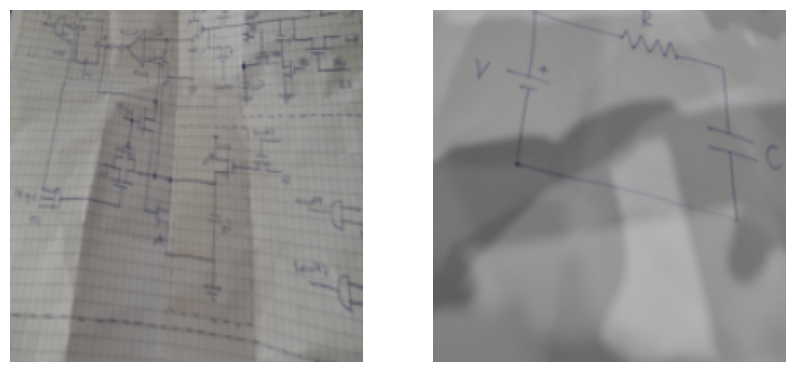

In [74]:
print("DataLoaders created with custom collation function.")
print(f"Number of training batches: {len(dls.train)}")
print(f"Number of validation batches: {len(dls.valid)}")

# Verify a single batch to ensure it's correctly formatted
batch = dls.one_batch() # Renamed yb to yb_targets for clarity

# xb, yb_targets = batch
# print("\nShape of one batch (xb, yb_targets):")
# print(f"Image batch shape: {xb.shape}") # Should be (bs, channels, height, width)

# print(f"Type of yb_targets: {type(yb_targets)}") # Expect tuple


# Optionally, display a sample from the batch to visually confirm
dls.show_batch(max_n=2, figsize=(10, 7))